In [1]:
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import MDS
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler
from skbio.stats.composition import clr
import re
import os
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("gbs_cohort_taxonomy_raw_counts_2024-06-20.txt", sep="\t")
smoothed = df + 1
relative_abundances = smoothed.div(smoothed.sum(axis=1), axis=0)
relative_abundances

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__Brevibacillus;s__Brevibacillus_thermoruber,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatitalea;s__Desulfatitalea_tepidiphila,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0022,0.000148,0.000882,0.252547,0.021199,0.187892,0.282596,3.751112e-07,0.007466,0.000051,0.000001,...,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07,3.751112e-07
magic.1142,0.000109,0.000155,0.002811,0.000213,0.001686,0.000302,6.658284e-06,0.000052,0.000006,0.000005,...,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07,9.511834e-07
magic.0519,0.000283,0.000140,0.040913,0.002505,0.022318,0.030635,4.116467e-05,0.000931,0.000071,0.000010,...,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07,8.948842e-07
magic.0051,0.000355,0.000168,0.000618,0.000040,0.000516,0.000017,4.411049e-04,0.000006,0.002021,0.000042,...,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06,1.011709e-06
magic.1120,0.000002,0.000060,0.003740,0.000015,0.000182,0.000034,1.082034e-06,0.000003,0.000001,0.000005,...,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06,1.082034e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,0.003063,0.000018,0.000096,0.000011,0.000039,0.000048,2.294052e-06,0.000002,0.009956,0.000608,...,2.294052e-06,2.294052e-06,2.294052e-06,2.294052e-06,2.294052e-06,2.294052e-06,2.294052e-06,2.29

In [3]:
# non_smoothed_relative_abundances = df
# non_smoothed_relative_abundances = non_smoothed_relative_abundances.div(non_smoothed_relative_abundances.sum(axis=1), axis=0)
# non_smoothed_relative_abundances

In [4]:
relative_abundances.sum(axis=1)

magic.0022    1.0
magic.1142    1.0
magic.0519    1.0
magic.0051    1.0
magic.1120    1.0
             ... 
magic.5263    1.0
magic.5187    1.0
magic.5176    1.0
magic.5175    1.0
magic.5088    1.0
Length: 1381, dtype: float64

In [5]:
metadata = pd.read_csv("gbs_cohort_metadata_2024-06-20.txt", sep="\t", index_col=1)
metadata

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
sample_id,,,,,,,,,,,,,,,,,,,,,
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,None,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0


In [6]:
transformed = pd.DataFrame(clr(relative_abundances), index=relative_abundances.index, columns=relative_abundances.columns)
transformed

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__Brevibacillus;s__Brevibacillus_thermoruber,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatitalea;s__Desulfatitalea_tepidiphila,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0022,5.765606,7.548891,13.206606,10.728946,12.910874,13.319028,-0.213280,9.685396,4.691995,0.885333,...,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280
magic.1142,4.392646,4.741464,7.638968,5.059360,7.128142,5.409765,1.593624,3.655047,1.439473,1.257152,...,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286
magic.0519,5.541968,4.842472,10.516495,7.723243,9.910454,10.227201,3.614867,6.733202,4.155674,2.184121,...,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774
magic.0051,5.660642,4.911843,6.214952,3.488735,6.034266,2.633069,5.877498,1.591615,7.399757,3.537525,...,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145
magic.1120,0.318374,3.632560,7.773094,2.264284,4.749191,3.059214,-0.374773,0.723839,-0.374773,1.234665,...,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,7.036354,1.919109,3.577337,1.449106,2.672881,2.884190,-0.160332,-0.160332,8.215297,5.419398,...,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332
magic.5187,9.872748,13.155048,7.671913,1.810720,6.801153,3.890162,5.122306,0.557957,10.131516,5.148014,...,-0.135190,-0.135190,-0.135190,-0.135190,-0.135190,-

In [7]:
metadata = metadata.loc[transformed.index]
metadata

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,None,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0
magic.5175,608,0,C-section,Other antibiotics,0.26,2019-10-03,1320,1,regular,NaN,...,2,None,No,0.02,0.02,Negative,White,Hispanic,152.4,190.0


In [8]:
metadata["age"] = pd.to_datetime(metadata['Date_Collected']) - pd.to_datetime(metadata["dob"])
metadata["age"] = [a.days for a in metadata["age"]]
metadata["age"]

magic.0022      NaN
magic.1142    368.0
magic.0519    185.0
magic.0051     30.0
magic.1120    365.0
              ...  
magic.5263      8.0
magic.5187      7.0
magic.5176      8.0
magic.5175      8.0
magic.5088      2.0
Name: age, Length: 1381, dtype: float64

In [9]:
metadata = metadata[~metadata["age"].isna()]
transformed = transformed.loc[metadata.index]

In [10]:
metadata_noabx = metadata[metadata["matabx_expo_cat"] == "No antibiotics"]
transformed_noabx = transformed.loc[metadata_noabx.index]

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(metadata_noabx["magic_id"])
groups = label_encoder.transform(metadata_noabx["magic_id"])

In [12]:
from sklearn.preprocessing import StandardScaler

def zscore(df, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(df)
    return pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns), scaler

1000.0


100%|█████████████████████████████████████████████████████████████| 186/186 [00:52<00:00,  3.57it/s]


RMSE: 95.8479762187616


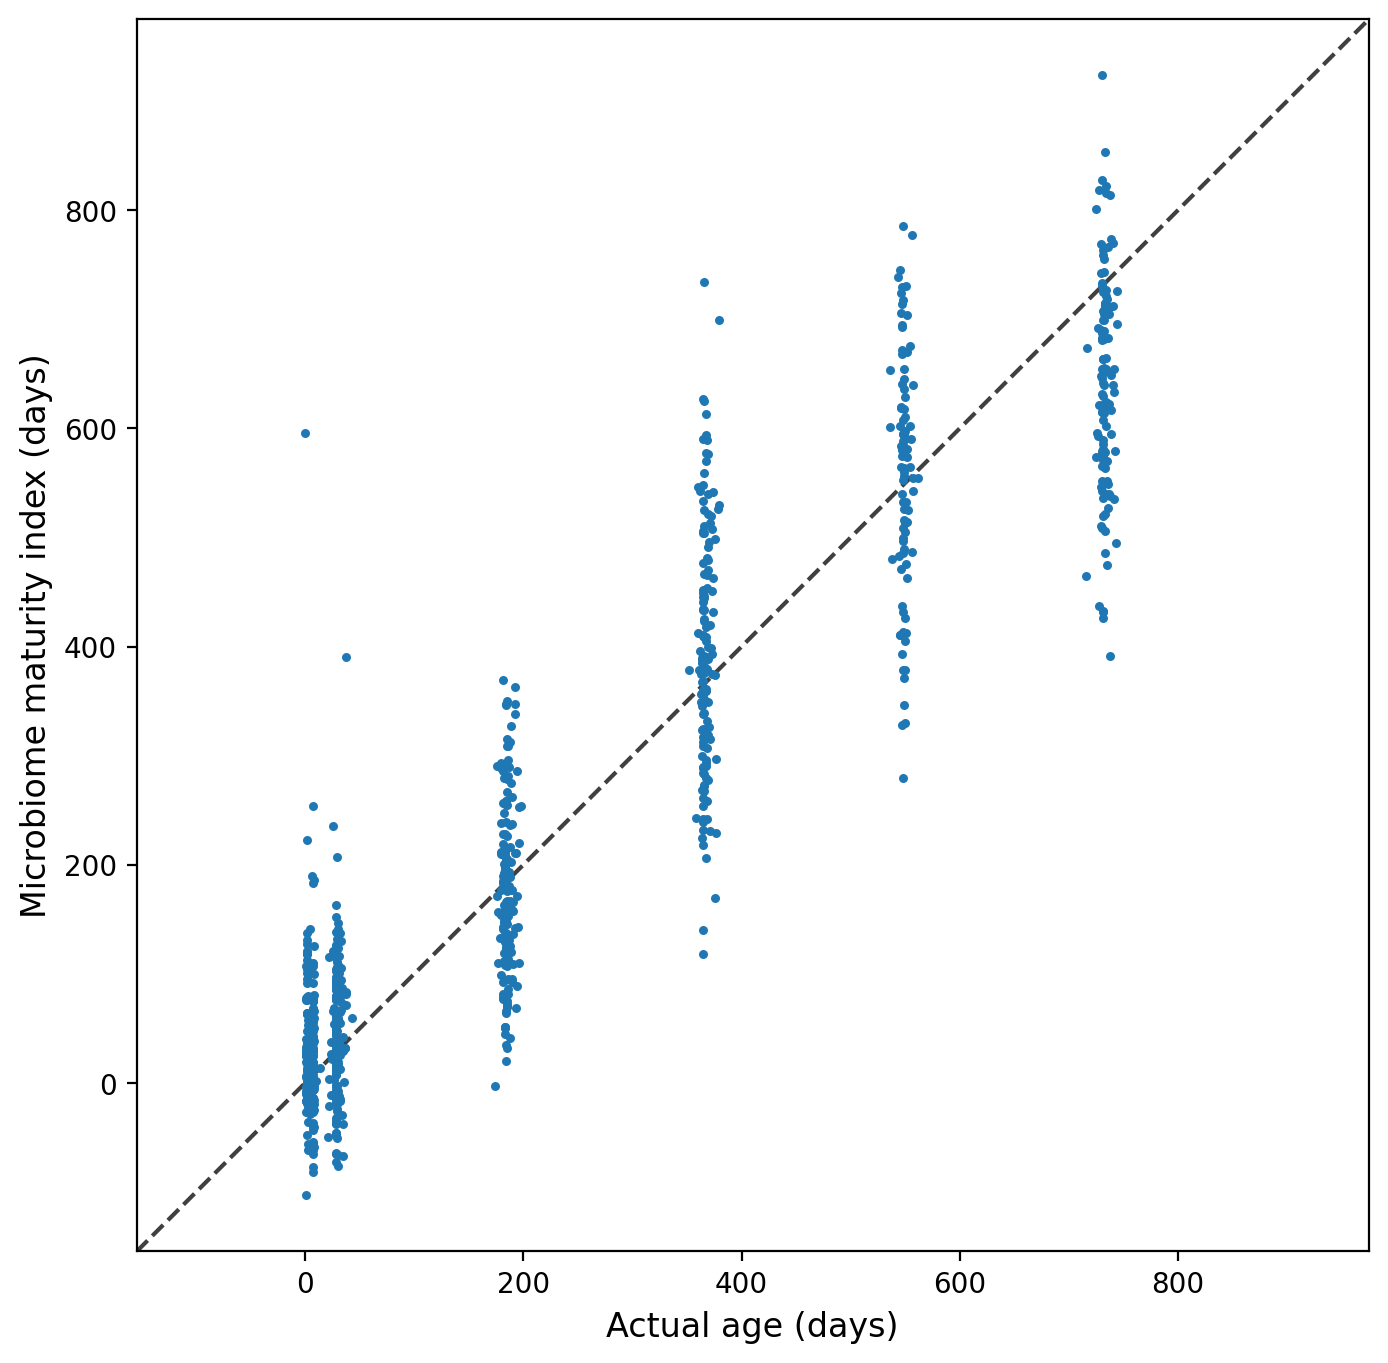

In [14]:
from tqdm import tqdm
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import numpy as np

taxa = transformed_noabx
labels = metadata_noabx["age"]

logo = LeaveOneGroupOut()

# for alpha in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
for alpha in [1e3]:
    print(alpha)

    predictions = np.ones(labels.shape) * -420

    for (train_index, test_index) in tqdm(logo.split(taxa, groups=groups), total=max(groups) + 1):

        X_train = taxa.iloc[train_index]
        y_train = labels.iloc[train_index]
        
        X_test = taxa.iloc[test_index]
        y_test = labels.iloc[test_index]
        
        model = Ridge(alpha)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
#         pred = model.predict(X_test)
        predictions[test_index] = pred

    mse = mean_squared_error(predictions, labels)
    rmse = np.sqrt(mse)

    print("RMSE:", rmse)

    plt.figure(figsize=(10, 8), dpi=200)

    plt.scatter(labels, predictions, s=5)

    plt.xlabel("Actual age (days)", size=12)
    plt.ylabel("Microbiome maturity index (days)", size=12)
    
    ax = plt.gca()

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims) 

    plt.show()

In [15]:
metadata_gbs = metadata[metadata["matabx_expo_cat"] == "GBS antibiotics"]
transformed_gbs = transformed.loc[metadata_gbs.index]

RMSE: 99.88673141096189


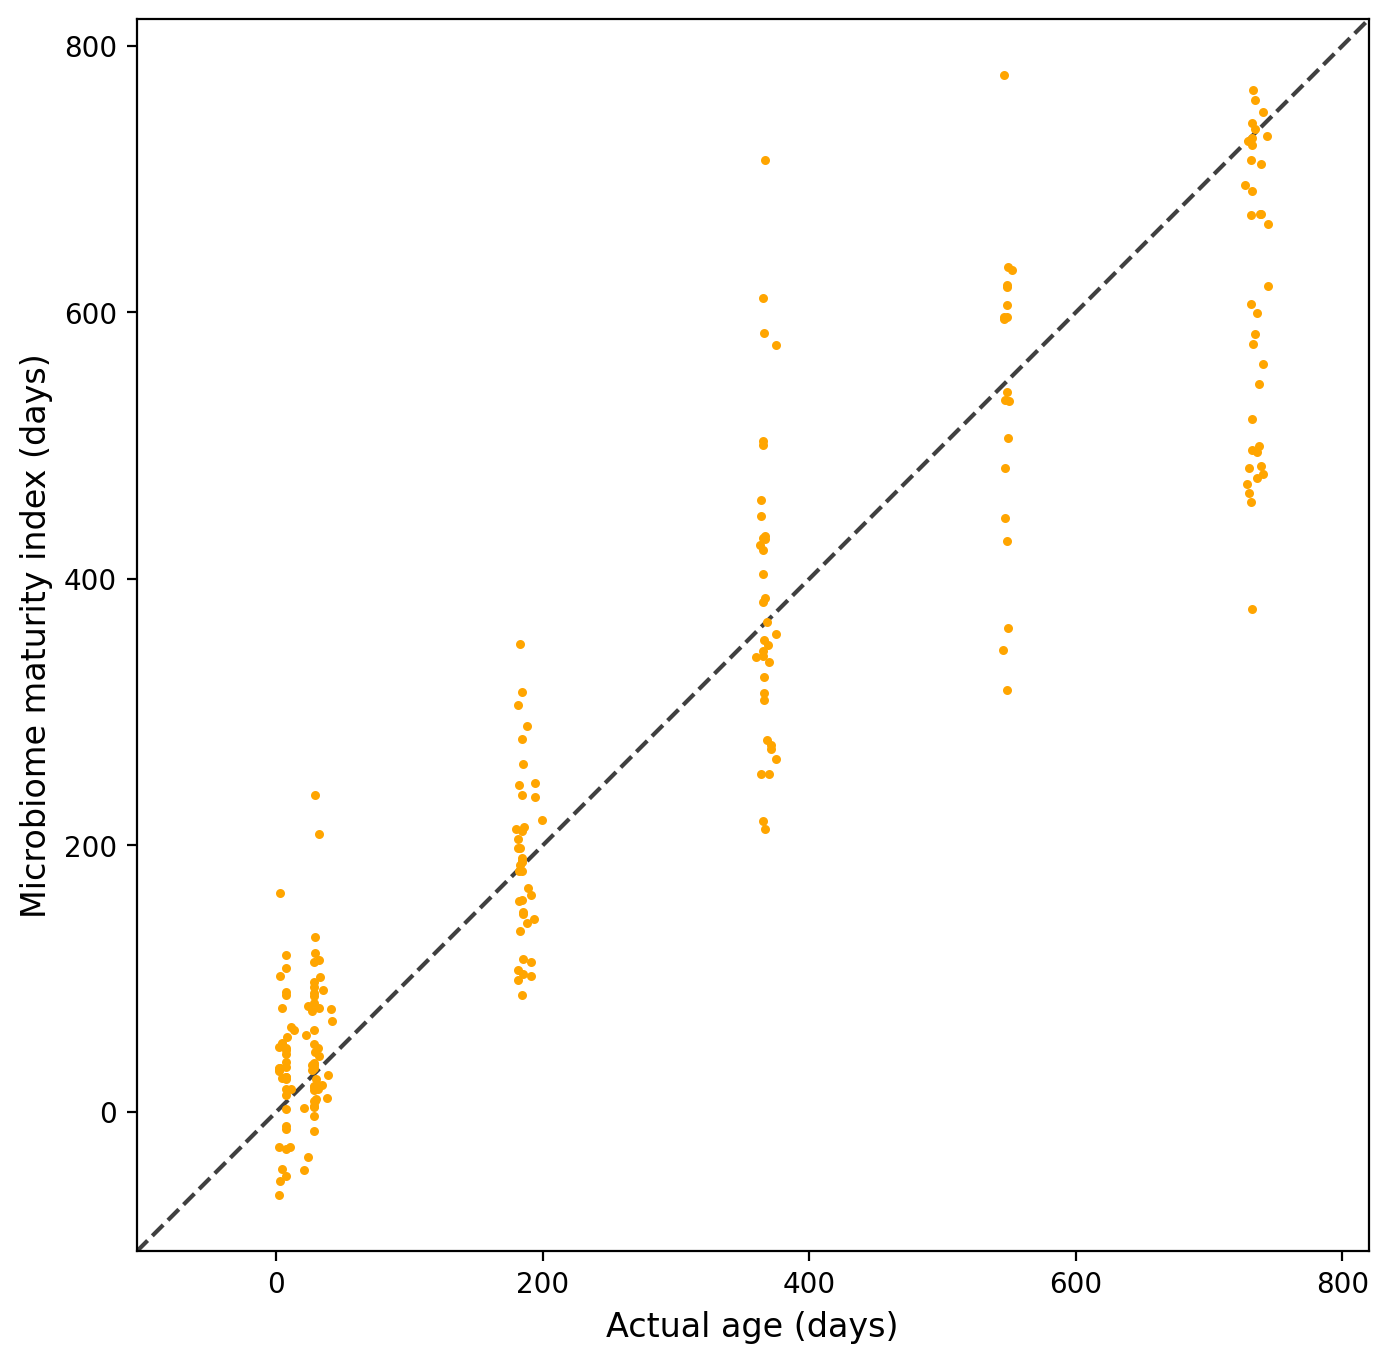

In [17]:
from sklearn.ensemble import RandomForestRegressor

alpha = 1e3

labels = metadata_gbs["age"]

model = Ridge(alpha)

model.fit(transformed_noabx, metadata_noabx["age"])

model = Ridge(alpha)
model.fit(transformed_noabx, metadata_noabx["age"])
pred = model.predict(transformed_gbs)

# pred = model.predict(transformed_gbs)

mse = mean_squared_error(pred, labels)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

plt.figure(figsize=(10, 8), dpi=200)

plt.scatter(labels, pred, s=5, c="orange")

plt.xlabel("Actual age (days)", size=12)
plt.ylabel("Microbiome maturity index (days)", size=12)

ax = plt.gca()

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims) 

plt.show()

# Random Forest regressor

In [32]:
prevalent = df.columns[((df > 10).mean() > 0.5)]
prevalent

Index(['k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri',
       'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885',
       'k__Bact

100%|█████████████████████████████████████████████████████████████| 186/186 [31:19<00:00, 10.11s/it]


RMSE: 94.82857499500625


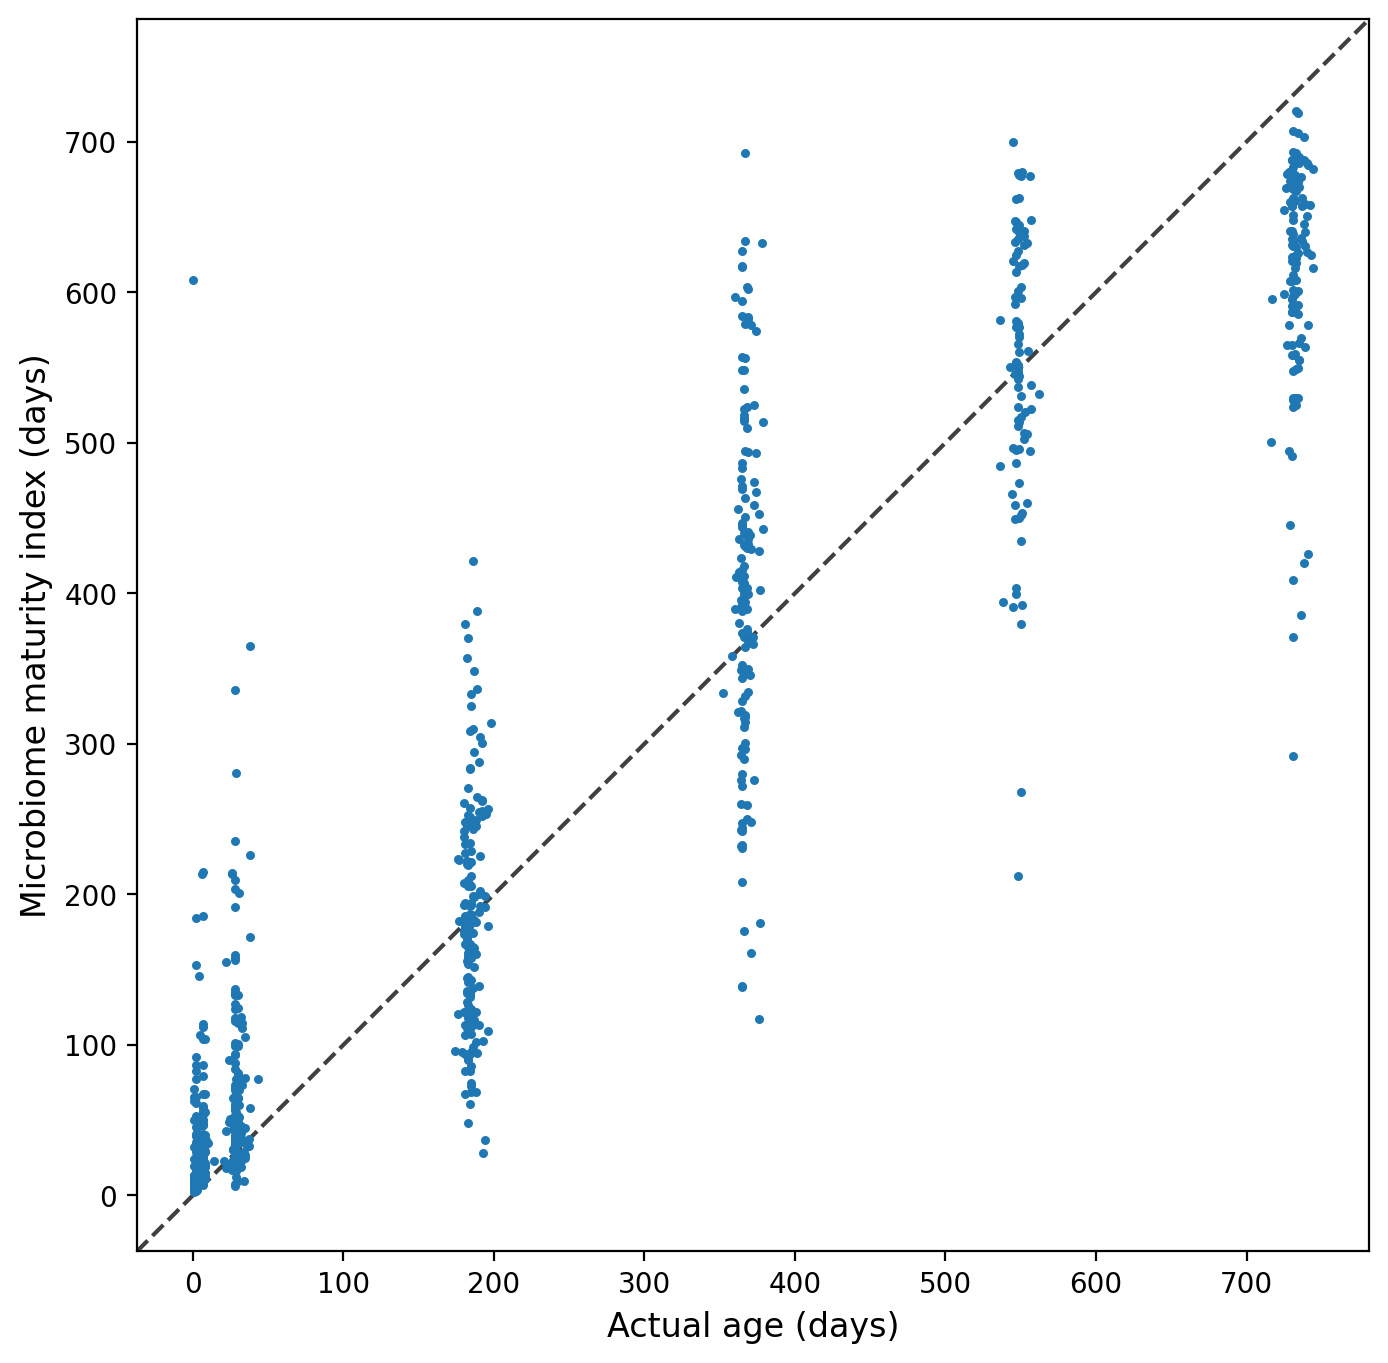

In [33]:
taxa = transformed_noabx[prevalent]
labels = metadata_noabx["age"]

logo = LeaveOneGroupOut()

predictions = np.ones(labels.shape) * -420

for (train_index, test_index) in tqdm(logo.split(taxa, groups=groups), total=max(groups) + 1):

    X_train = taxa.iloc[train_index]
    y_train = labels.iloc[train_index]

    X_test = taxa.iloc[test_index]
    y_test = labels.iloc[test_index]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    predictions[test_index] = pred

mse = mean_squared_error(predictions, labels)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

plt.figure(figsize=(10, 8), dpi=200)

plt.scatter(labels, predictions, s=5)

plt.xlabel("Actual age (days)", size=12)
plt.ylabel("Microbiome maturity index (days)", size=12)

ax = plt.gca()

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims) 

plt.show()

RMSE: 103.1907171279902


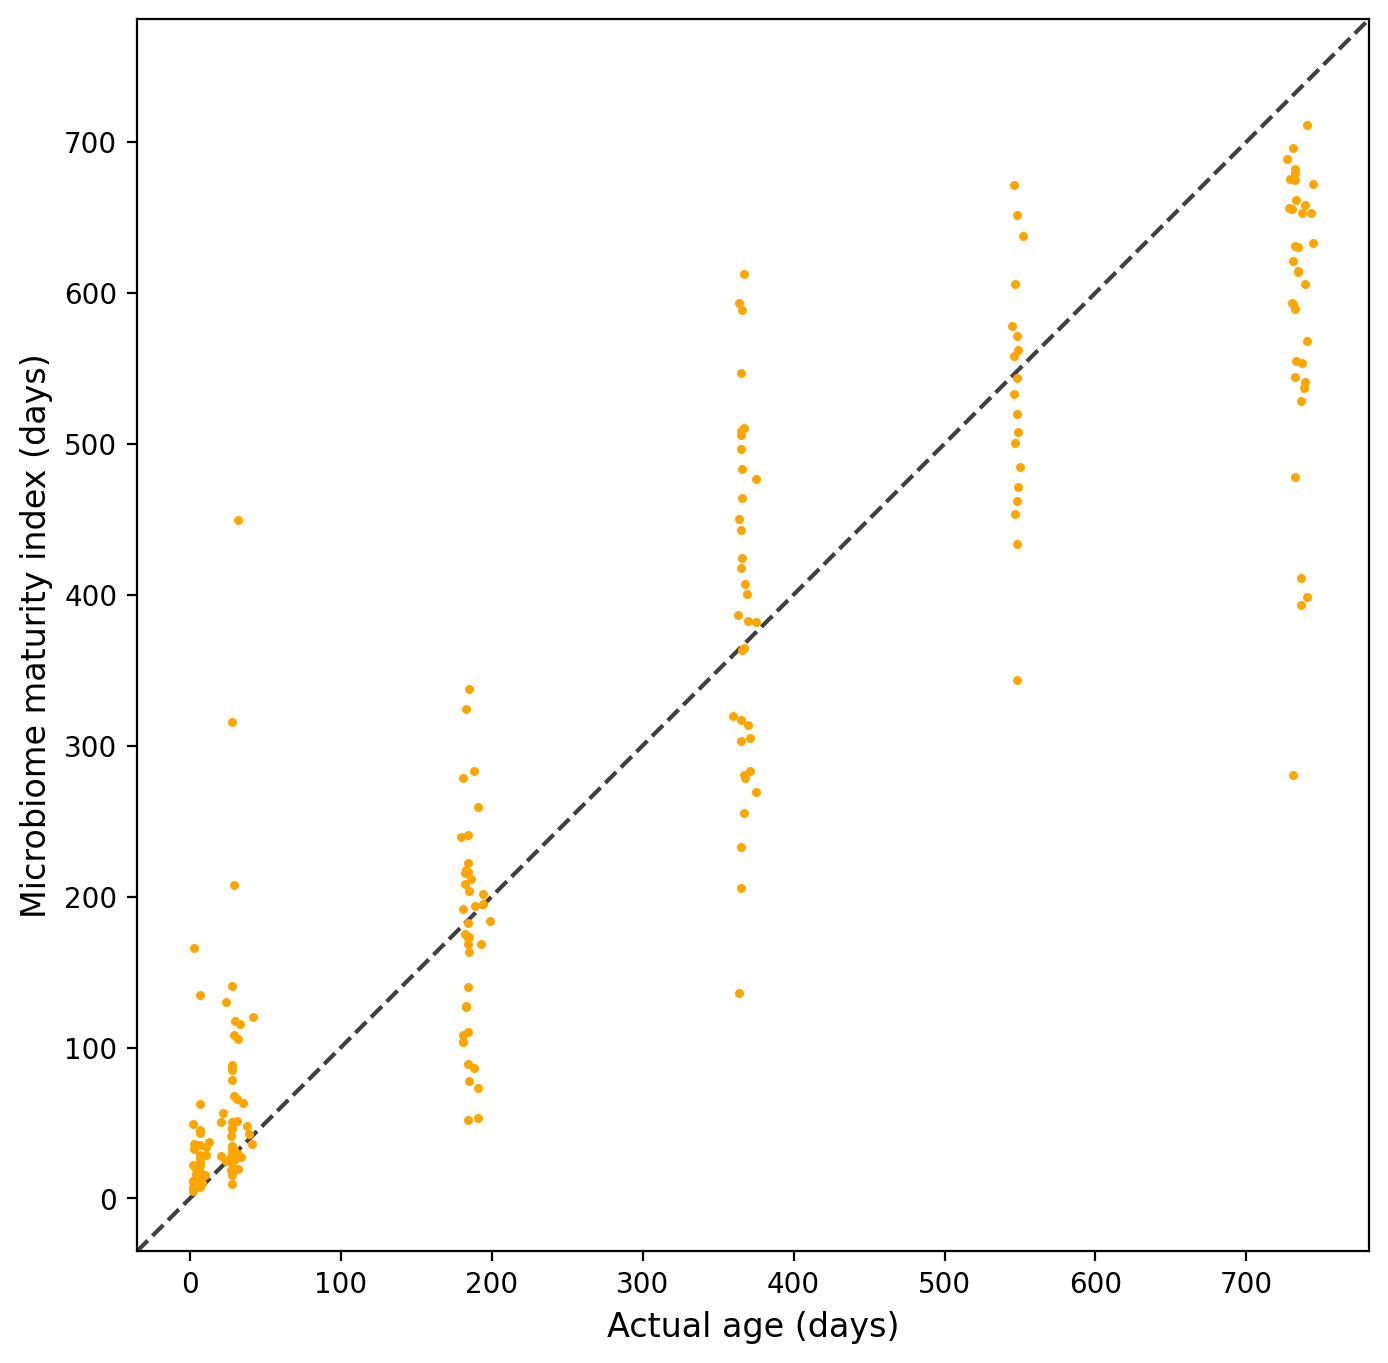

In [34]:

alpha = 1e3

labels = metadata_gbs["age"]

model = RandomForestRegressor()

model.fit(transformed_noabx[prevalent], metadata_noabx["age"])
pred = model.predict(transformed_gbs[prevalent])

# pred = model.predict(transformed_gbs)

mse = mean_squared_error(pred, labels)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

plt.figure(figsize=(10, 8), dpi=200)

plt.scatter(labels, pred, s=5, c="orange")

plt.xlabel("Actual age (days)", size=12)
plt.ylabel("Microbiome maturity index (days)", size=12)

ax = plt.gca()

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims) 

plt.show()